# Warmup Example
This is a quick classification problem designed to introduce the use of Keras for creating and training neural networks.  We create sample data with two features (x1, x2) in four classes, and then construct a simple two layer network to determine which class an example belongs given a feature vector.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

%matplotlib inline

### Create Data

In [2]:
c1 = np.transpose(np.vstack([np.random.normal(loc=0.25, scale=0.1, size=200),np.random.normal(loc=0.25, scale=0.1, size=200),np.ones((1,200))*0]))
c2 = np.transpose(np.vstack([np.random.normal(loc=0.25, scale=0.1, size=200),np.random.normal(loc=0.75, scale=0.1, size=200),np.ones((1,200))*1]))
c3 = np.transpose(np.vstack([np.random.normal(loc=0.75, scale=0.1, size=200),np.random.normal(loc=0.25, scale=0.1, size=200),np.ones((1,200))*2]))
c4 = np.transpose(np.vstack([np.random.normal(loc=0.75, scale=0.1, size=200),np.random.normal(loc=0.75, scale=0.1, size=200),np.ones((1,200))*3]))

df_train = pd.DataFrame(np.vstack([c1,c2,c3,c4]), columns=['x1','x2','target'])

In [3]:
cmap = get_cmap('Spectral')

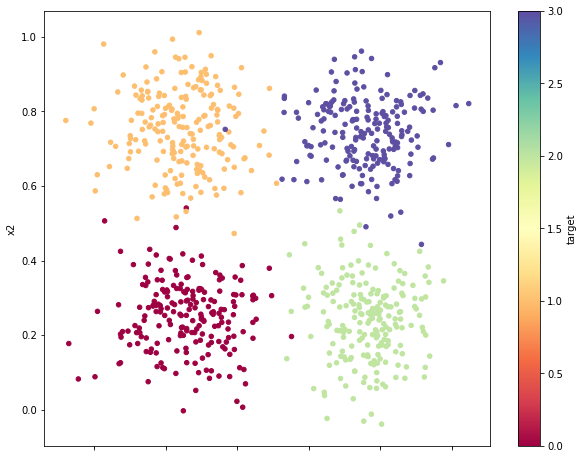

In [4]:
df_train.plot(x='x1', y='x2', kind='scatter', c='target', cmap=cmap, figsize=(10, 8))

In [5]:
X_train = df_train[['x1','x2']].values
 = pd.get_dummies(df_train['target']).values

In [6]:
X_train

array([[ 0.39647544,  0.3079081 ],
       [ 0.34928457,  0.25886329],
       [ 0.1856273 ,  0.26236176],
       ..., 
       [ 0.67158693,  0.93931078],
       [ 0.84784458,  0.7154065 ],
       [ 0.77815529,  0.68141378]])

In [29]:
y_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ..., 
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

### Build Model

Creating a model for this task is relatively straightforward using Keras.  We import the Model and Layer classes we need, as well as an optimizer.  The layers are chained together to create a computational graph, and then the model is fit on the example data.

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.optimizers import SGD

In [24]:
def get_model():
    input_data = Input(shape=(2, ))
    dense_layer = Dense(8, activation='relu')(input_data)
    output_prediction = Dense(4, activation='softmax')(dense_layer)
    
    model = Model(inputs=[input_data], outputs=[output_prediction])
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=0.02),
                  metrics=['accuracy'])
    
    return model

In [25]:
model = get_model()

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 36        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x=X_train, y=y_train, batch_size=16, epochs=60)

Epoch 1/60
800/800 [==============================] - 0s 413us/step - loss: 1.3842 - acc: 0.1687
Epoch 2/60
800/800 [==============================] - 0s 186us/step - loss: 1.3310 - acc: 0.2888
Epoch 3/60
800/800 [==============================] - 0s 180us/step - loss: 1.2858 - acc: 0.4738
Epoch 4/60
800/800 [==============================] - 0s 193us/step - loss: 1.2434 - acc: 0.5375
Epoch 5/60
800/800 [==============================] - 0s 187us/step - loss: 1.2020 - acc: 0.6038
Epoch 6/60
800/800 [==============================] - 0s 182us/step - loss: 1.1612 - acc: 0.6963
Epoch 7/60
800/800 [==============================] - 0s 177us/step - loss: 1.1206 - acc: 0.7612
Epoch 8/60
800/800 [==============================] - 0s 184us/step - loss: 1.0803 - acc: 0.7913 0s - loss: 1.0921 - acc: 0.76
Epoch 9/60
800/800 [==============================] - 0s 182us/step - loss: 1.0398 - acc: 0.8500
Epoch 10/60
800/800 [==============================] - 0s 185us/step - loss: 0.9985 - acc: 0.8750

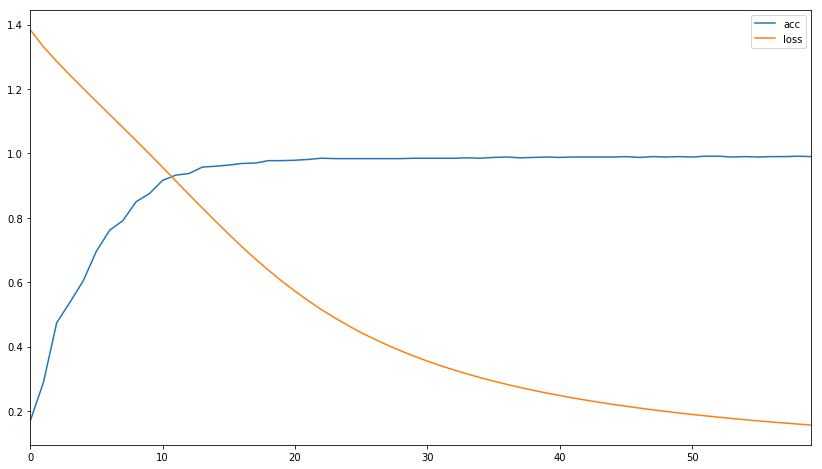

In [28]:
pd.DataFrame(model.history.history).plot(figsize=(14,8))

In [32]:
model.predict(np.array([[0.25,0.25]]))

array([[  9.31607366e-01,   5.66722862e-02,   1.08009093e-02,
          9.19455488e-04]], dtype=float32)